In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from PIL import Image

In [2]:
# Load the image data
image = plt.imread('cat_image.jpg') 

In [3]:
image.shape

(1333, 1000, 3)

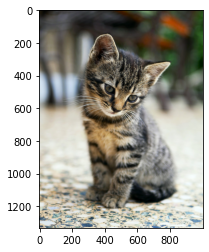

In [4]:
plt.imshow(image)
plt.show()

In [5]:
# Convert the image to grayscale
w1 = 0.6
w2 = 0.2
w3 = 0.9
image_gray = np.dot(image[..., :3], [w1, w2, w3])

In [6]:
# The shape of image_gray is (height, width).

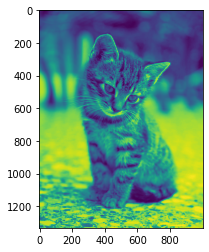

In [7]:
plt.imshow(image_gray)
plt.show()

In [8]:
print(image_gray.shape)

(1333, 1000)


In [ ]:
# rank(A) = min(m, n)
# rank ~ 1000 % this example
# 1000 basis vectors

In [ ]:
# A_{m x n} = U_{m x n} S_{n x n} V_{n x n} % full_matrices = False
# A_{m x n} = U_{m x m} S_{n x n} V_{n x n} % full_matrices = True

In [15]:
# Perform singular value decomposition
U, S, V = np.linalg.svd(image_gray, full_matrices = False)

In [16]:
print(U.shape)
print(S.shape)
print(V.shape)

(1333, 1000)
(1000,)
(1000, 1000)


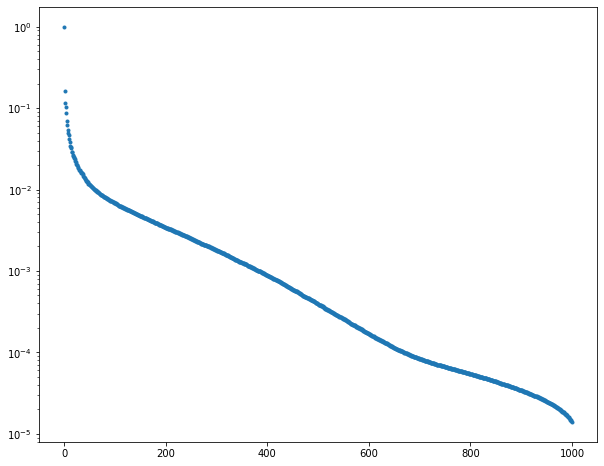

In [19]:
plt.figure(figsize = (10, 8))
plt.semilogy(S/max(S), '.')
plt.show()

In [39]:
# Set the desired number of singular values to keep (e.g., 100)
k = 1000
Uk = U[:, :k]
Sk = np.diag(S[:k])
Vk = V[:k, :]

In [40]:
# Reconstruct the image using the selected singular values
reconstructed_image = np.dot(Uk, np.dot(Sk, Vk))

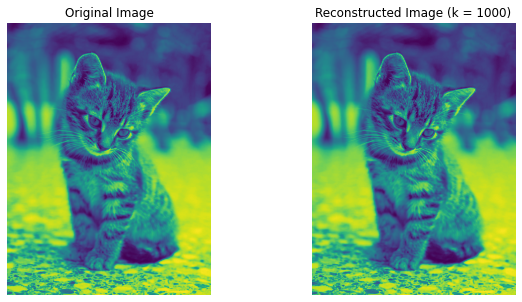

In [41]:
# Display the original and reconstructed images
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
axs[0].imshow(image_gray)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(reconstructed_image)
axs[1].set_title('Reconstructed Image (k = {})'.format(k))
axs[1].axis('off')

plt.show()

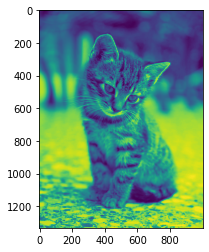

In [44]:
plt.imshow(image_gray)

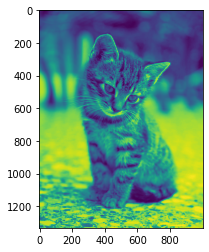

In [45]:
plt.imshow(reconstructed_image)

In [42]:
mat_or_f = np.linalg.norm(image_gray, 'fro')**2
mat_rec_f = np.linalg.norm(reconstructed_image, 'fro')**2
error = (mat_or_f - mat_rec_f)/mat_or_f
print(error)

0.0


In [46]:
# Perform QR decomposition
Q, R = np.linalg.qr(image_gray)

In [47]:
# Reconstruct the image using Q and R
reconstructed_image = np.dot(Q, R)

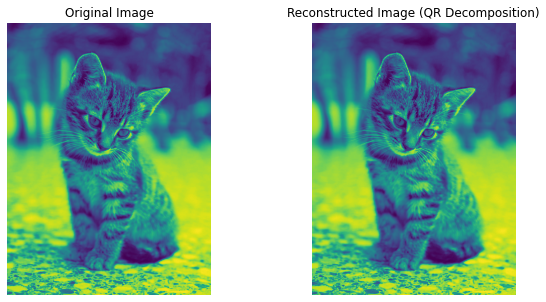

In [48]:
# Display the original and reconstructed images
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
axs[0].imshow(image_gray)
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(reconstructed_image)
axs[1].set_title('Reconstructed Image (QR Decomposition)')
axs[1].axis('off')
plt.show()
